# 1. Setup And Load Data 
##### 1.1 Install Dependencies & Import 

In [180]:
# I installed the packages below through the terminal
# !pip install tensorflow tensorflow-gpu opencv-python matplotlib 

import tensorflow as tf
import os

In [181]:
# Avoid Out Of Memory errors by setting GPU memory consumption growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

##### 1.2 Load Data

In [182]:
import cv2 # opencv
import imghdr # check file extentions for certain images

In [183]:
image_extns = ['jpeg', 'jpg', 'png']
data_dir = 'data'

In [184]:
#img=cv2.imread(os.path.join('data', 'available', 'Screenshot 2023-03-17 153704.png'))
#img.shape
#plt.imshow(img)

In [185]:
# Check every image within the main 'Data' folder for incorrect
# file extention types
for folder in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, folder)):
        image_path = os.path.join(data_dir, folder, image)
        try:
            #img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_extns:
                print('Image does not have valid extention', format(image_path))
                os.remove(image_path)
        except:
                print('Could not read image', format(image_path))

In [186]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [187]:
import numpy as np 
from matplotlib import pyplot as plt

In [188]:
# Builds image data set (this is the data pipeline)
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 435 files belonging to 2 classes.


In [189]:
# Data set is not preloaded into memory already (it is a 
# only a generator), so we have to convert data set into
# numpy iterator to access data 
data_iterator = data.as_numpy_iterator()

In [190]:
# Get batch of data
batch = data_iterator.next()

In [191]:
# images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [192]:
batch[1].shape

(32,)

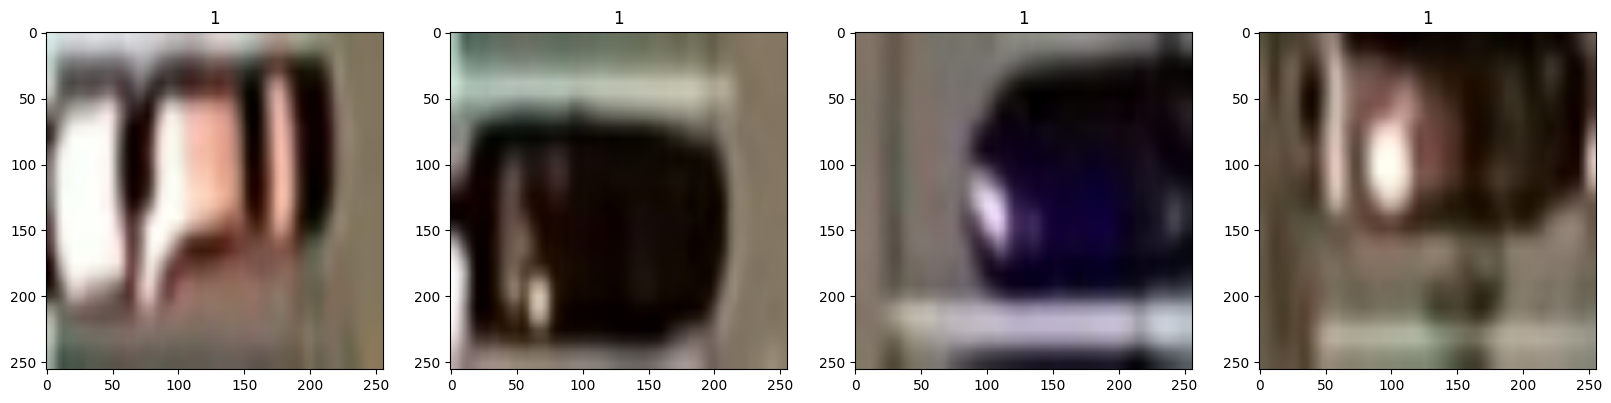

In [193]:
# Check what each flag is
# folder 0 = available
# folder 1 = unavailable
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 2. Preprocess Data
##### 2.1 Scale Data

In [194]:
scaledData = data.map(lambda x,y: (x/255, y))

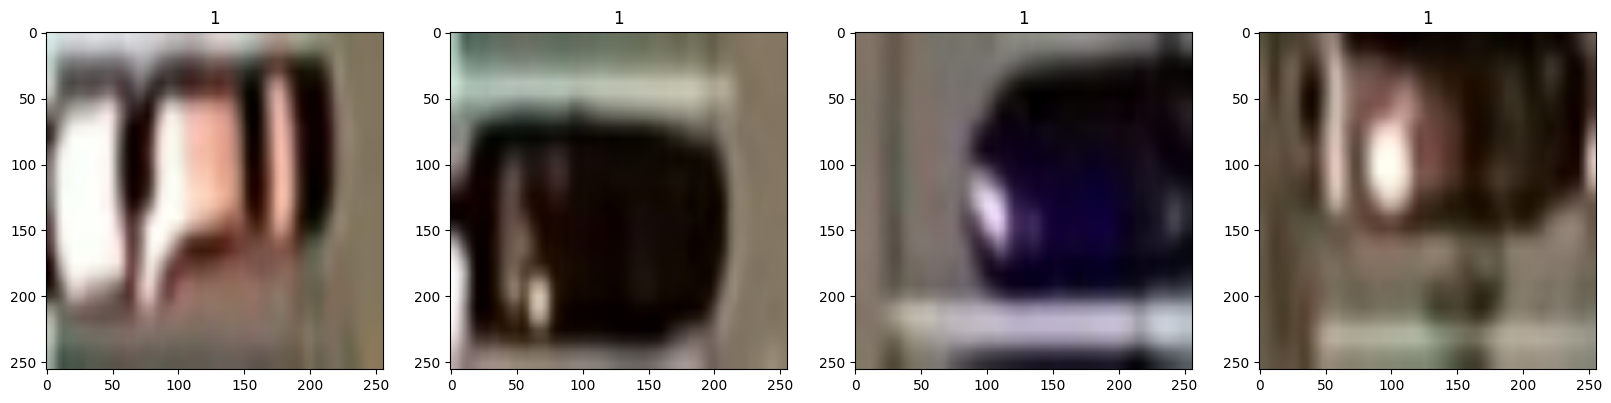

In [195]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

##### 2.2 Categorize Data 
###### into training and testing partition 

In [196]:
len(scaledData) #14 batches


14

In [197]:
# training data: what is used to train deep learning model
# validation data: used to evaluate model while training (fine tuning)
# test data: used post training to evaluate training
train_size = int(len(scaledData)*.7)
val_size = int(len(scaledData)*.2)+1
test_size = int(len(scaledData)*.1)+1

In [198]:
# take: defines how much data to use for partition 
train = scaledData.take(train_size)
validate = scaledData.skip(train_size).take(val_size)
test = scaledData.skip(train_size + val_size).take(test_size)

# 3. Deep Model
##### 3.1 Build Deep Learning Model 

In [202]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout